<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/3_Enrich_users_profiles_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 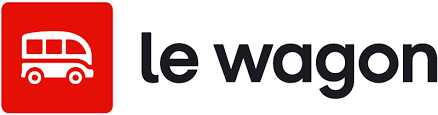

# Enrich users profiles

In this challenge, you will explore a dataset of companies and extract companies information from it!


## General data exploration




Import the [`microsoft_companies.json`](https://drive.google.com/file/d/1Zrja9KY-05u8XsGfK-P97zGa-NyipS49/view?usp=sharing) file into Colab.

Run the code below to get the results in the `microsoft_companies` variable. We will study on Day 3 how to load data in Python.

In [2]:
import json
with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

What is the type of the `microsoft_companies` variable?



In [8]:
type (microsoft_companies)

list

How many companies are in this list?

In [11]:
num_companies = len(microsoft_companies)
("Number of companies in the list:", num_companies)

('Number of companies in the list:', 301)

## Specific data exploration


Look at the first item on this list. What type is it?


In [13]:
first_item = microsoft_companies[0]

In [25]:
type_first_item = type(first_item)
("Type of the first item:", type_first_item)

('Type of the first item:', type)

For this first item, display the company name, industry, domain and total number of employees.

In [35]:
print(microsoft_companies[0]['fields']['name'])
print(microsoft_companies[0]['fields']['industry'])
print(microsoft_companies[0]['fields']['domain0'])
print(microsoft_companies[0]['fields']['total_employee_estimate'])

microsoft
computer games
https://www.develop-online.net
44


Do you think that this company named "microsoft" is the giant American company?

> **False**


Obviously not ! It seems there are homonyms in our list.

Create a new empty list and add all the companies whose names are exactly "microsoft".

To do this, you will need to loop through all the companies and use a condition to check that their names are indeed "microsoft". If this is the case, the company information will be added to the empty list.

How many are there?

In [51]:
exact_microsoft_companies = []

microsoft_list = []

for record in microsoft_companies:
  if record['fields']['name'].lower() == "microsoft":
    microsoft_list.append(record)
    num_microsoft_companies = len(microsoft_list)
    print("Number of companies with name 'Microsoft':", num_microsoft_companies)

Number of companies with name 'Microsoft': 1
Number of companies with name 'Microsoft': 2
Number of companies with name 'Microsoft': 3
Number of companies with name 'Microsoft': 4
Number of companies with name 'Microsoft': 5
Number of companies with name 'Microsoft': 6


Among the results obtained, do you see the giant American company?

You can run the code below and then use the `pprint` function to indent the results. It works like the `print` function with improved readability.

In [55]:
microsoft_list = []
for record in microsoft_companies:
  if record['fields']['name'].lower() == "microsoft":
    microsoft_list.append(record)
    num_microsoft_companies = len(microsoft_list)
    print("Number of companies with name 'Microsoft':", num_microsoft_companies)
    pprint(microsoft_list)

    num_microsoft_companies = len(microsoft_list)
    print("Number of companies with name 'Microsoft':", num_microsoft_companies)


Number of companies with name 'Microsoft': 1
[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_estimate': 44},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f'}]
Number of companies with name 'Microsoft': 1
Number of companies with name 'Microsoft': 2
[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_e

> **6**


## Cleaning the data


### Encoding categories

To facilitate the work of the other teams, we will translate the number of employees into categories. To do this, we will use the following correspondences:
   - less than 5: "small business"
   - from 5 to 30: "startup"
   - from 30 to 200: "scaleup"
   - from 200 to 1000: "big companies"
   - more than 1000: "very large companies"


Write a function that takes one argument, the number of employees, and returns the corresponding category.

⚠️ Don't forget to return the corresponding category at the end of your function using the **return** keyword. \
Look carefully at the syntax of functions in the lecture.


In [59]:
def from_nb_employee_to_category(num_employees):
    if num_employees < 5:
        return "small business"
    elif 5 <= num_employees <= 30:
        return "startup"
    elif 30 < num_employees <= 200:
        return "scaleup"
    elif 200 < num_employees <= 1000:
        return "big companies"
    else:
        return "very large companies"

print(from_nb_employee_to_category(23))






startup


### Transform the data


We will go through all the companies in the initial file.

We will create an empty list that will record all the information about each company as we go along.

For each company, store in a **dictionary** the company's name, industry, domain and company category (in relation to its number of employees, using your previous function). Then add this dictionary to your list.

In the end, your list will contain all the dictionaries of all the companies.

In [64]:
def categorize_employees(num_employees):
    if num_employees < 5:
        return "small business"
    elif 5 <= num_employees <= 30:
        return "startup"
    elif 30 < num_employees <= 200:
        return "scaleup"
    elif 200 < num_employees <= 1000:
        return "big companies"
    else:
        return "very large companies"

company_info_list = []

for record in microsoft_companies:
    # Extract company information
    company_name = record['fields']['name']
    industry = record['fields']['industry']
    domain = record['fields']['domain0']
    num_employees = record['fields']['total_employee_estimate']
    category = categorize_employees(num_employees)

    company_info = {
        'name': company_name,
        'industry': industry,
        'domain': domain,
        'category': category
    }

    company_info_list.append(company_info)

for company_info in company_info_list:
    print(company_info)

{'name': 'microsoft', 'industry': 'computer games', 'domain': 'https://www.develop-online.net', 'category': 'scaleup'}
{'name': 'omaha microsoft technology group', 'industry': 'information technology and services', 'domain': 'https://www.omahamtg.com', 'category': 'small business'}
{'name': 'microsoft alumni network ambassadors', 'industry': 'non-profit organization management', 'domain': 'https://www.', 'category': 'small business'}
{'name': 'scbn | microsoft certified professional - google partner', 'industry': 'internet', 'domain': 'https://www.scbn.biz', 'category': 'startup'}
{'name': 'locatelli mcc - designing domotica (voip) solutions combined with microsoft lync services!', 'industry': 'information technology and services', 'domain': 'https://www.locatelli-mcc.com', 'category': 'small business'}
{'name': 'chelford solutions for microsoft', 'industry': 'computer software', 'domain': 'https://www.', 'category': 'startup'}
{'name': 'troy consulting / microsoft', 'industry': 'compu

Use the code below to create a `DataFrame` from it. We will learn more about this Python object in future lectures.

In [72]:
import pandas as pd
import json

def categorize_employees(num_employees):
    if num_employees < 5:
        return "small business"
    elif 5 <= num_employees <= 30:
        return "startup"
    elif 30 < num_employees <= 200:
        return "scaleup"
    elif 200 < num_employees <= 1000:
        return "big companies"
    else:
        return "very large companies"

# Load the JSON file
with open('microsoft_companies.json', 'r') as file:
    microsoft_companies = json.load(file)

# Create an empty list to store information about each company
company_info_list = []

# Iterate through all the companies
for record in microsoft_companies:
    # Extract company information
    company_name = record['fields']['name']
    industry = record['fields']['industry']
    domain = record['fields']['domain0']
    num_employees = record['fields']['total_employee_estimate']
    category = categorize_employees(num_employees)

    # Create a dictionary with company information
    company_info = {
        'name': company_name,
        'industry': industry,
        'domain': domain,
        'category': category
    }

    # Add the dictionary to the list
    company_info_list.append(company_info)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(company_info_list)

# Display the DataFrame
print(df)



                                                  name  \
0                                            microsoft   
1                     omaha microsoft technology group   
2                 microsoft alumni network ambassadors   
3    scbn | microsoft certified professional - goog...   
4    locatelli mcc - designing domotica (voip) solu...   
..                                                 ...   
296  pmx dynamics-business software for the real es...   
297                             microsoft game studios   
298                        microsoft alumni foundation   
299  naveksa a/s - manufacturing solutions for micr...   
300               f-keys ltd microsoft training centre   

                                industry                           domain  \
0                         computer games   https://www.develop-online.net   
1    information technology and services         https://www.omahamtg.com   
2     non-profit organization management                     https://www

Congratulations, you just created your first DataFrame! 🚀

### More accurate cleaning


What do you notice about `domains` column ?

When no domain has been found, the API outputs "https://www.".

This piece of information is not relevant to other teams. Modify your code to delete that.


<details>
    <summary>Hint 🔍</summary>
One way to do so is to not store this key/value pair when iterating over all companies.
</details>

In [73]:
import pandas as pd
import json

def categorize_employees(num_employees):
    if num_employees < 5:
        return "small business"
    elif 5 <= num_employees <= 30:
        return "startup"
    elif 30 < num_employees <= 200:
        return "scaleup"
    elif 200 < num_employees <= 1000:
        return "big companies"
    else:
        return "very large companies"

# Load the JSON file
with open('microsoft_companies.json', 'r') as file:
    microsoft_companies = json.load(file)

# Create an empty list to store information about each company
company_info_list = []

# Iterate through all the companies
for record in microsoft_companies:
    # Extract company information
    company_name = record['fields']['name']
    industry = record['fields']['industry']
    domain = record['fields']['domain0']
    if domain == "https://www.":
        domain = None  # Set domain to NULL
    num_employees = record['fields']['total_employee_estimate']
    category = categorize_employees(num_employees)

    # Create a dictionary with company information
    company_info = {
        'name': company_name,
        'industry': industry,
        'domain': domain,
        'category': category
    }

    # Add the dictionary to the list
    company_info_list.append(company_info)

# Create a DataFrame from the list of dictionaries
df_microsoft_companies_clean = pd.DataFrame(company_info_list)

# Display the DataFrame
print(df_microsoft_companies_clean)


                                                  name  \
0                                            microsoft   
1                     omaha microsoft technology group   
2                 microsoft alumni network ambassadors   
3    scbn | microsoft certified professional - goog...   
4    locatelli mcc - designing domotica (voip) solu...   
..                                                 ...   
296  pmx dynamics-business software for the real es...   
297                             microsoft game studios   
298                        microsoft alumni foundation   
299  naveksa a/s - manufacturing solutions for micr...   
300               f-keys ltd microsoft training centre   

                                industry                           domain  \
0                         computer games   https://www.develop-online.net   
1    information technology and services         https://www.omahamtg.com   
2     non-profit organization management                             Non

Run the code below to export the clean dataframe to a CSV. We will learn more about the `to_csv()`function in future lectures.


In [74]:
df_microsoft_companies_clean.to_csv("microsoft_companies.csv",index=False)